In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import time
import pydde as d
import matplotlib.pyplot as plt
import json
import sklearn
import os

########################################
#PARAMETERS
time_length = 60; #seconds
sampletot = 8000
samplenum = 7000
testsize = 1-samplenum/sampletot
epochs = 250
minibatch_size= 50
hiddenlayers = [100]
input_size = 3
output_size = 3*time_length
learning_rate = 0.01
LRdecay = 0.7
data_file_path = 'Data/Samples/data_20k_2x2/'

In [16]:
#########################################
#LOAD SAMPLES
number_of_files = len(os.listdir('Data/Samples/data_20k_2x2/'))-2
number_of_samples = 1000*number_of_files
p = np.zeros((3*time_length, number_of_samples))
y_target = np.zeros((number_of_samples, 3))
gradnorm_truth = np.zeros(number_of_samples)
iterations_truth = np.zeros(number_of_samples)
loss_truth  = np.zeros(number_of_samples)

for filenum in range(number_of_files):
    with open(data_file_path + f'data_{filenum}.json') as json_file:
        data = json.load(json_file)
        filesize = len(data['y_target'])
        for i, p_i in enumerate(data['parameter']):
            p[:, filenum*filesize+i] = np.array(p_i)
        for s, y_s in enumerate(data['y_target']):
            y_target[filenum*filesize+s, :] = np.array(y_s)
        for i, truth in enumerate(data['loss']):
            loss_truth[filenum*filesize+i] = np.array(truth)
        for i, truth in enumerate(data['iterations']):
            iterations_truth[filenum*filesize+i] = np.array(truth)
        for i, truth in enumerate(data['loss']):
            gradnorm_truth[filenum*filesize+i] = np.array(truth)
p = p.transpose()
print(y_target.shape)
print(p.shape)

y_target_ = y_target[~(y_target == 0).all(1)]
p_ = p[~(p == 0).all(1)]

print(y_target_.shape)

(20000, 3)
(20000, 180)
(20000, 3)


539.0

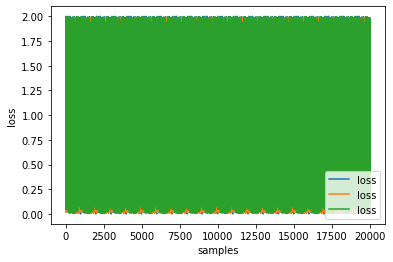

0.03244208466521508


In [19]:
loss_test_plot = plt.plot(loss_truth, label = 'loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('samples')
plt.show()
tot_error = np.mean(loss_truth)
print(tot_error)

In [25]:
test = y_target[0:1000, :]- y_target[3001:4001]
test = test[~(test == 0).all(1)]
test

array([[ 0.2434518 , -0.37202748,  0.85188186],
       [-1.48379858, -0.33070374, -1.70241522],
       [-0.29265286,  1.01745091,  0.43335353],
       ...,
       [-0.66453579, -1.53532374, -0.68797148],
       [ 1.25602034, -0.16883989, -0.02322686],
       [-0.23718304,  1.46896196,  0.06938675]])

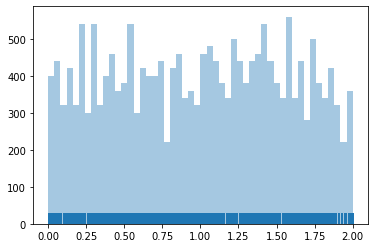

In [13]:
import seaborn as sns
x = y_target[:, 0]
sns.distplot(x, bins=50, kde=False, rug=True)

In [26]:
from datetime import date
today = date.today()
print('wahdh', today)

wahdh 2020-07-02
